## Introducción de Pytorch

In [ ]:
import torch
import torch.nn as nn
from sklearn.datasets import load_iris
torch.manual_seed(0)

data = load_iris(as_frame=True)
df = data["data"]
df["target"] = data["target"]
df = df.sample(frac=1,random_state = 1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
14,5.8,4.0,1.2,0.2,0
98,5.1,2.5,3.0,1.1,1
75,6.6,3.0,4.4,1.4,1
16,5.4,3.9,1.3,0.4,0
131,7.9,3.8,6.4,2.0,2
...,...,...,...,...,...
133,6.3,2.8,5.1,1.5,2
137,6.4,3.1,5.5,1.8,2
72,6.3,2.5,4.9,1.5,1
140,6.7,3.1,5.6,2.4,2


In [ ]:
X = df.drop(columns="target").to_numpy()
y = df.target.values
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [ ]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()
X, y

(tensor([[5.8000, 4.0000, 1.2000, 0.2000],
         [5.1000, 2.5000, 3.0000, 1.1000],
         [6.6000, 3.0000, 4.4000, 1.4000],
         [5.4000, 3.9000, 1.3000, 0.4000],
         [7.9000, 3.8000, 6.4000, 2.0000],
         [6.3000, 3.3000, 4.7000, 1.6000],
         [6.9000, 3.1000, 5.1000, 2.3000],
         [5.1000, 3.8000, 1.9000, 0.4000],
         [4.7000, 3.2000, 1.6000, 0.2000],
         [6.9000, 3.2000, 5.7000, 2.3000],
         [5.6000, 2.7000, 4.2000, 1.3000],
         [5.4000, 3.9000, 1.7000, 0.4000],
         [7.1000, 3.0000, 5.9000, 2.1000],
         [6.4000, 3.2000, 4.5000, 1.5000],
         [6.0000, 2.9000, 4.5000, 1.5000],
         [4.4000, 3.2000, 1.3000, 0.2000],
         [5.8000, 2.6000, 4.0000, 1.2000],
         [5.6000, 3.0000, 4.5000, 1.5000],
         [5.4000, 3.4000, 1.5000, 0.4000],
         [5.0000, 3.2000, 1.2000, 0.2000],
         [5.5000, 2.6000, 4.4000, 1.2000],
         [5.4000, 3.0000, 4.5000, 1.5000],
         [6.7000, 3.0000, 5.0000, 1.7000],
         [5

## Feed Forward Networks en Pytorch

In [ ]:
fc1 = nn.Linear(in_features = 4, out_features=12)
activation_pytorch = fc1(X)
activation_pytorch

tensor([[ 0.2620, -0.5313,  0.3907,  ..., -0.0451, -1.2113, -2.9476],
        [-1.2096, -0.2586, -0.1372,  ...,  0.1342, -1.1130, -1.4764],
        [-1.7676, -0.3754, -0.3786,  ...,  0.2964, -1.2234, -1.6176],
        ...,
        [-2.1432, -0.3500, -0.5168,  ...,  0.3048, -1.1075, -1.1932],
        [-2.6030,  0.0033, -0.6494,  ...,  0.8202, -1.6117, -1.0077],
        [ 0.1126, -0.4532,  0.3573,  ...,  0.0660, -1.0688, -2.4856]],
       grad_fn=<AddmmBackward0>)

In [ ]:
W1 = fc1.weight.data
b1 = fc1.bias.data

W1.shape, b1.shape

(torch.Size([12, 4]), torch.Size([12]))

In [ ]:
phi1 = X@W1.T + b1
print(phi1.shape)
phi1

torch.Size([150, 12])


tensor([[ 0.2620, -0.5313,  0.3907,  ..., -0.0451, -1.2113, -2.9476],
        [-1.2096, -0.2586, -0.1372,  ...,  0.1342, -1.1130, -1.4764],
        [-1.7676, -0.3754, -0.3786,  ...,  0.2964, -1.2234, -1.6176],
        ...,
        [-2.1432, -0.3500, -0.5168,  ...,  0.3048, -1.1075, -1.1932],
        [-2.6030,  0.0033, -0.6494,  ...,  0.8202, -1.6117, -1.0077],
        [ 0.1126, -0.4532,  0.3573,  ...,  0.0660, -1.0688, -2.4856]])

In [ ]:
torch.equal(activation_pytorch, phi1)

True

## El nn.Module

El nn.Module permite generar modelos modularizados y reutilizables.

El nn.Module tiene dos componentes, el `__init__()` y el `forward()`.

* El `__init__()` es lo que se llama un constructor. Es donde se inicializarán todos las capas que serán utilizadas por el modelo.

* El `forward()` se encarga de indicar como se conecta cada capa.

In [ ]:
class MLP(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.fc1 = nn.Linear(in_features, out_features)


    ## Esto permite garantizar que las capas lineales se inicializan igual
    self.fc1.weight.data = W1
    self.fc1.bias.data = b1
  def forward(self,x):
    x = self.fc1(x)
    return x

model = MLP(in_features=4, out_features = 12)
model(X)

tensor([[ 0.2620, -0.5313,  0.3907,  ..., -0.0451, -1.2113, -2.9476],
        [-1.2096, -0.2586, -0.1372,  ...,  0.1342, -1.1130, -1.4764],
        [-1.7676, -0.3754, -0.3786,  ...,  0.2964, -1.2234, -1.6176],
        ...,
        [-2.1432, -0.3500, -0.5168,  ...,  0.3048, -1.1075, -1.1932],
        [-2.6030,  0.0033, -0.6494,  ...,  0.8202, -1.6117, -1.0077],
        [ 0.1126, -0.4532,  0.3573,  ...,  0.0660, -1.0688, -2.4856]],
       grad_fn=<AddmmBackward0>)

> La gracia de poder utilizar el `nn.Module` es poder combinar Módulos para crear Módulos más grandes.

In [ ]:
class MLP2(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.fc1 = nn.Linear(in_features, out_features)
    self.relu = nn.ReLU(inplace = True)
    self.fc2 = nn.Linear(out_features, 1)

  def forward(self,x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    return x

class SuperMLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.mlp1 = MLP(in_features=4, out_features=12)
    self.mlp2 = MLP2(in_features=12, out_features=8)
  def forward(self, x):
    x = self.mlp1(x)
    x = self.mlp2(x)
    return x

super_model = SuperMLP()
logits = super_model(X)
logits.shape

torch.Size([150, 1])

In [ ]:
p = torch.sigmoid(logits)
p

tensor([[0.7422],
        [0.7184],
        [0.7528],
        [0.7390],
        [0.7915],
        [0.7581],
        [0.7759],
        [0.7312],
        [0.7083],
        [0.7764],
        [0.7313],
        [0.7379],
        [0.7709],
        [0.7558],
        [0.7447],
        [0.7044],
        [0.7303],
        [0.7411],
        [0.7285],
        [0.7139],
        [0.7249],
        [0.7383],
        [0.7592],
        [0.7227],
        [0.7692],
        [0.7350],
        [0.7414],
        [0.7299],
        [0.7367],
        [0.7487],
        [0.7455],
        [0.7820],
        [0.7233],
        [0.7587],
        [0.7583],
        [0.7284],
        [0.7223],
        [0.7208],
        [0.7493],
        [0.7500],
        [0.7679],
        [0.7240],
        [0.7295],
        [0.7527],
        [0.7481],
        [0.7732],
        [0.7378],
        [0.7221],
        [0.7085],
        [0.7287],
        [0.7190],
        [0.7276],
        [0.7924],
        [0.7712],
        [0.7643],
        [0

## Entrenamiento de un Modelo

In [ ]:
super_model

SuperMLP(
  (mlp1): MLP(
    (fc1): Linear(in_features=4, out_features=12, bias=True)
  )
  (mlp2): MLP2(
    (fc1): Linear(in_features=12, out_features=8, bias=True)
    (relu): ReLU()
    (fc2): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(super_model.parameters(), lr = 3e-4)

In [ ]:
epochs = 50
loss_history = []
for e in range(epochs):
  print("Epoch: ", e+1)
  # Define el modo del Modelo
  super_model.train()
  optimizer.zero_grad()

  ## Forward Pass
  logits = super_model(X)
  print("Logits Shape: ", logits.shape)
  print("Target Shape: ", y.shape)
  loss = criterion(logits, y.unsqueeze(-1))
  ## Calcula los gradientes (Backward Pass)
  loss.backward()

  # Actualización de los Pesos.
  optimizer.step()
  loss_history.append(loss.item())


Epoch:  1
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  2
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  3
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  4
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  5
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  6
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  7
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  8
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  9
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  10
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  11
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  12
Logits Shape:  torch.Size([150, 1])
Target Shape:  torch.Size([150])
Epoch:  13
Logits Shape:  torch.Size([150, 1])
Ta

0.00767595274373889


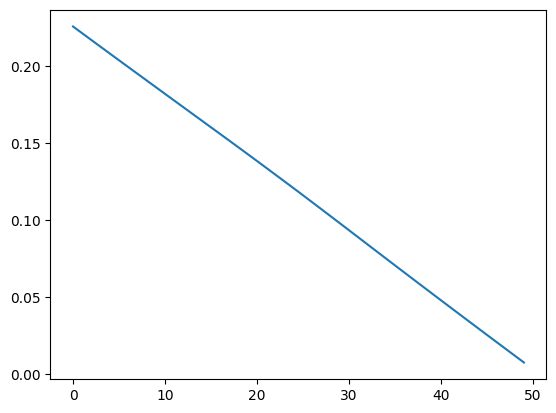

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
print(loss_history[-1])